# Проектная работа для компании Procrastinate Pro+ 

Мы в роли маркетингового аналитика развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Наша задача — разобраться в причинах и помочь компании выйти в плюс.

**Нам предстоит изучить:**
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

**Описание данных:**


В нашем распоряжении три датасета. Файл `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта, `orders_info_short.csv` — информацию о заказах, а `costs_info_short.csv` — информацию о расходах на рекламу.

**Структура `visits_info_short.csv`:**

- `user_id` — уникальный идентификатор пользователя,
- `region` — страна пользователя,
- `device` — тип устройства пользователя,
- `channel` — идентификатор источника перехода,
- `session_start` — дата и время начала сессии,
- `session_end` — дата и время окончания сессии.

**Структура `orders_info_short.csv`:**

- `user_id` — уникальный идентификатор пользователя,
- `event_dt` — дата и время покупки,
- `revenue` — сумма заказа.

**`Структура costs_info_short.csv`:**

- `dt` — дата проведения рекламной кампании,
- `channel` — идентификатор рекламного источника,
- `costs` — расходы на эту кампанию.

### Чтение данных и предобработка.

Проверим данные на пропуски и дубликаты. Убедимся, что типы данных во всех колонках соответствуют сохранённым в них значениям.

In [1]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

pd.set_option('display.max_rows', 300)

In [2]:
sessions = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
ad_costs = pd.read_csv('/datasets/costs_info_short.csv')

file_list = [sessions, orders, ad_costs]
events = None
observation_date = datetime(2019, 11, 1).date()
analysis_horizon = 14

In [3]:
for i in file_list:
    i.info()
    print('Количество дубликатов явных дубликатов =', i.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
Количество дубликатов явных дубликатов = 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
Количество дубликатов явных дубликатов = 0
<class 'pandas.core.frame.DataFram

**Вывод:**

Пропуски и явные дубликаты во всех трёх датафреймах отсутвуют.
Следует привести некоторые столбцы в тип данных `datetime`, также привести к нижнему регистру и переименовать столбцы в стиле `snake_case`.

**`to_datetime`**



**`sessions`:** 
-  `session Start`
- `session End`


**`orders`:** 
- `Event Dt`


**`ad_costs`:** 
-  `dt`

In [4]:
# функция to_snake_case удаляет пробелы из строки перед преобразованием в snake_case стиль
def to_snake_case(column_name):
    column_name = column_name.replace(' ', '')
    return ''.join(['_' + i.lower() if i.isupper() else i for i in column_name]).lstrip('_')

def rename_columns_to_snake_case(df):
    new_columns = {column: to_snake_case(column) for column in df.columns}
    df.rename(columns=new_columns, inplace=True)

# Применяем функцию к каждому датафрейму
for dataframe in file_list:
    rename_columns_to_snake_case(dataframe)

In [5]:
sessions[['session_start', 'session_end']] = sessions[['session_start', 'session_end']].apply(pd.to_datetime)
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
ad_costs['dt'] = pd.to_datetime(ad_costs['dt'])

# проверяем явные и неявные дубликаты
for i in file_list:
    i.info()
    print('Количество дубликатов явных дубликатов =', i.duplicated().sum())
print()    
print('Уникальные элементы из датафрейма sessions:')
for column in sessions[['region', 'device', 'channel']]:
    print()
    print(sessions[column].unique())
print()
print('Уникальные элементы из датафрейма ad_costs')
print(ad_costs['channel'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
Количество дубликатов явных дубликатов = 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](

### Задать функции для расчёта и анализа LTV, ROI, удержания и конверсии.

#### Функции для вычисления значений метрик.

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

In [6]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [7]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [8]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [9]:
def get_ltv(
    profiles,  # Шаг 1. Получить профили и данные о покупках
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Шаг 2. Добавить данные о покупках в профили

    result_raw = result_raw.merge(
        # добавляем в профили время совершения покупок и выручку
        purchases[['user_id', 'event_dt', 'revenue']],
        on='user_id',
        how='left',
    )

    # Шаг 3. Рассчитать лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # Шаг 3. Построить таблицу выручки
        # строим «треугольную» таблицу
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='revenue',  # в ячейках — выручка за каждый лайфтайм
            aggfunc='sum',
        )

        # Шаг 4. Посчитать сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)

        # Шаг 5. Вычислить размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # Шаг 6. Объединить размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Шаг 7. Посчитать LTV
        # делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### Функции для построения графиков.

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [10]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [11]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

# plot_retention(retention, retention_history, 7)

In [12]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

# conversion_raw, conversion, conversion_history = get_conversion(
#     profiles_big,
#     orders_big,
#     datetime(2018, 1, 1).date(),
#     7,
#     dimensions=['channel'],
# )
# plot_conversion(conversion, conversion_history, 7)

In [13]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=14):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))
    
    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных.

- Составить профили пользователей. Определить минимальную и максимальную даты привлечения пользователей.
- Выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнать, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построить таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучить рекламные источники привлечения и определить каналы, из которых пришло больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.
- Сформулировать выводы после каждого пункта.

#### Профили пользователей.

In [14]:
profiles = get_profiles(sessions, orders, ad_costs)

profiles['dt'] = profiles['first_ts'].dt.date
profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

min_date = profiles['dt'].min()
max_date = profiles['dt'].max()
print("Минимальная дата привлечения: {}\nМаксимальная дата привлечения: {}".format(min_date, max_date))

profiles

Минимальная дата привлечения: 2019-05-01 00:00:00
Максимальная дата привлечения: 2019-10-27 00:00:00


,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


#### Распределение пользователей по странам.

In [15]:
def get_country_stats(profiles):
    country_stats = profiles.groupby('region').agg(
        total_users=('user_id', 'count'),
        paying_users=('payer', 'sum')
    ).reset_index()

    country_stats['paying_users'] = country_stats['paying_users'].astype(int)
    total_users = country_stats['total_users'].sum()
    country_stats['user_share'] = (country_stats['total_users'] / total_users) * 100
    country_stats['user_share'] = country_stats['user_share'].apply(lambda x: f'{x:.2f}%')

    country_stats['paying_share'] = (country_stats['paying_users'] / country_stats['total_users']) * 100
    country_stats['paying_share'] = country_stats['paying_share'].apply(lambda x: f'{x:.2f}%')
    return country_stats.sort_values(by='total_users', ascending=False)

country_stats = get_country_stats(profiles)
country_stats

,region,total_users,paying_users,user_share,paying_share
3,United States,100002,6902,66.66%,6.90%
2,UK,17575,700,11.72%,3.98%
0,France,17450,663,11.63%,3.80%
1,Germany,14981,616,9.99%,4.11%


**Вывод:**

- Соединенные Штаты имеют наибольшее количество пользователей (100,002), что составляет 66.66% от общего числа. Среди них 6,902 (6.90%) являются платящими пользователями.


- Великобритания находится на втором месте по количеству пользователей (17,575), что составляет 11.72% от общего числа. Среди них 700 (3.98%) являются платящими пользователями.


- Франция занимает третье место с 17,450 пользователями, что составляет 11.63% от общего числа. Среди них 663 (3.80%) являются платящими пользователями.


- Германия имеет наименьшее количество пользователей (14,981) среди этих стран, что составляет 9.99% от общего числа. Среди них 616 (4.11%) являются платящими пользователями, что является вторым самым высоким показателем после Соединенных Штатов.


Таким образом, Соединенные Штаты являются наиболее прибыльным рынком, так как они имеют самое большое количество пользователей и самую высокую долю платящих пользователей. В то же время, несмотря на то что Германия имеет меньше пользователей, она демонстрирует вторую самую высокую долю платящих пользователей, что делает ее также перспективным рынком.

#### Распределение пользователей по девайсам.

In [16]:
def get_device_stats(profiles):
    device_stats = profiles.groupby('device').agg(
        total_users=('user_id', 'count'),
        paying_users=('payer', 'sum')
    ).reset_index()

    device_stats['paying_users'] = device_stats['paying_users'].astype(int)
    total_users = device_stats['total_users'].sum()
    device_stats['user_share'] = (device_stats['total_users'] / total_users) * 100
    device_stats['user_share'] = device_stats['user_share'].apply(lambda x: f'{x:.2f}%')

    device_stats['paying_share'] = (device_stats['paying_users'] / device_stats['total_users']) * 100
    device_stats['paying_share'] = device_stats['paying_share'].apply(lambda x: f'{x:.2f}%')
    return device_stats.sort_values(by='total_users', ascending=False)

device_stats = get_device_stats(profiles)
device_stats

,device,total_users,paying_users,user_share,paying_share
3,iPhone,54479,3382,36.32%,6.21%
0,Android,35032,2050,23.35%,5.85%
2,PC,30455,1537,20.30%,5.05%
1,Mac,30042,1912,20.03%,6.36%


**Вывод:**

- iPhone является самым популярным устройством среди пользователей, составляя 36.32% от общего числа (54,479 пользователей). Среди пользователей iPhone 3,382 (6.21%) являются платящими пользователями.


- Android находится на втором месте по популярности, составляя 23.35% от общего числа пользователей (35,032 пользователей). Среди пользователей Android 2,050 (5.85%) являются платящими пользователями.


- PC занимает третье место с 20.30% от общего числа пользователей (30,455 пользователей). Среди пользователей PC 1,537 (5.05%) являются платящими пользователями.


- Mac имеет немного меньше пользователей, чем PC, составляя 20.03% от общего числа (30,042 пользователей). Однако, среди пользователей Mac 1,912 (6.36%) являются платящими пользователями, что выше, чем у пользователей PC.


Таким образом, iPhone является наиболее популярным устройством среди пользователей, а также имеет наибольшую долю платящих пользователей. Mac, хотя и имеет меньше пользователей, чем PC, имеет более высокую долю платящих пользователей.

#### Изучиение рекламных источников.

In [17]:
def get_channel_stats(profiles):
    channel_stats = profiles.groupby('channel').agg(
        total_users=('user_id', 'count'),
        paying_users=('payer', 'sum')
    ).reset_index()

    channel_stats['paying_users'] = channel_stats['paying_users'].astype(int)
    total_users = channel_stats['total_users'].sum()
    channel_stats['user_share'] = (channel_stats['total_users'] / total_users) * 100
    channel_stats['user_share'] = channel_stats['user_share'].apply(lambda x: f'{x:.2f}%')

    channel_stats['paying_share'] = (channel_stats['paying_users'] / channel_stats['total_users']) * 100
    channel_stats['paying_share'] = channel_stats['paying_share'].apply(lambda x: f'{x:.2f}%')
    return channel_stats.sort_values(by='paying_users', ascending=False)


channel_stats = get_channel_stats(profiles)
channel_stats

,channel,total_users,paying_users,user_share,paying_share
1,FaceBoom,29144,3557,19.43%,12.20%
6,TipTop,19561,1878,13.04%,9.60%
10,organic,56439,1160,37.62%,2.06%
7,WahooNetBanner,8553,453,5.70%,5.30%
0,AdNonSense,3880,440,2.59%,11.34%
5,RocketSuperAds,4448,352,2.97%,7.91%
2,LeapBob,8553,262,5.70%,3.06%
4,OppleCreativeMedia,8605,233,5.74%,2.71%
9,lambdaMediaAds,2149,225,1.43%,10.47%
8,YRabbit,4312,165,2.87%,3.83%


**Вывод:**

- Organic - самый крупный канал привлечения пользователей, занимая почти 38% от общего числа. Однако его конверсия в платящих пользователей низкая, составляющая всего 2.06%. Возможно, это связано с тем, что трафик из этого канала менее целевой и включает много случайных пользователей.


- FaceBoom - второй по величине канал привлечения пользователей с долей почти 20%. Он обеспечивает высокую конверсию в платящих пользователей, составляющую 12.2%. Это указывает на эффективность кампаний в данном канале и возможность дополнительного масштабирования и оптимизации.


- TipTop - еще один крупный канал привлечения пользователей с долей 13%. С конверсией в платящих пользователей в 9.60%, данный канал также представляет интерес для дополнительной оптимизации и масштабирования.


- AdNonSense и LambdaMediaAds - хотя оба канала занимают меньше 3% от общего числа пользователей, они обеспечивают высокую конверсию в платящих пользователей, составляющую 11.34% и 10.47% соответственно. Их результаты указывают на высокую целевую аудиторию и потенциал для роста, если масштабировать рекламные кампании.


- RocketSuperAds - с долей менее 3% от общего числа пользователей, канал также имеет высокую конверсию в платящих пользователей (7.91%). Это может указывать на успешные рекламные кампании, которые можно оптимизировать и масштабировать для увеличения присутствия.


- Остальные каналы (OppleCreativeMedia, LeapBob, WahooNetBanner, MediaTornado и YRabbit) имеют относительно низкие показатели конверсии в платящих пользователей (от 2.71% до 5.30%). Они также занимают меньшую долю пользователей. Для улучшения результатов по этим каналам следует провести анализ текущих рекламных кампаний и определить возможности для оптимизации и повышения конверсии.


Для улучшения результатов и максимизации прибыли следует сосредоточиться на каналах, которые уже обеспечивают высокую конверсию в платящих пользователей, таких как FaceBoom, TipTop, AdNonSense, LambdaMediaAds и RocketSuperAds. Возможно, стоит провести дополнительные исследования для определения причин низкой конверсии в платящих пользователей в крупнейшем канале Organic и выработать стратегию по улучшению этого показателя.

#### Общий вывод по разделу.

- **По регионам:**

Большинство пользователей (66.66%) и платящих пользователей (6.90%) находятся в Соединенных Штатах.
Великобритания, Франция и Германия занимают примерно одинаковые доли рынка, но конверсия в платящих пользователей варьируется от 3.80% до 4.11%.


- **По устройствам:**

iPhone является наиболее популярным устройством среди пользователей (36.32%), а также имеет самую высокую конверсию в платящих пользователей (6.21%).
Android, PC и Mac занимают примерно равные доли рынка, но конверсия в платящих пользователей варьируется от 5.05% до 6.36%.


- **По каналам привлечения:**

Organic является крупнейшим каналом, обеспечивающим 37.62% пользователей, но конверсия в платящих пользователей составляет всего 2.06%.
FaceBoom, TipTop, AdNonSense, LambdaMediaAds и RocketSuperAds имеют высокую конверсию в платящих пользователей, варьирующуюся от 7.91% до 12.20%.
Остальные каналы, такие как OppleCreativeMedia, LeapBob, WahooNetBanner, MediaTornado и YRabbit, занимают меньшую долю рынка и имеют относительно низкие показатели конверсии.


- **Рекомендации:**

Сосредоточить усилия на оптимизации рекламных кампаний и повышении конверсии в Organic канале, а также поддерживать и развивать каналы с высокой конверсией, такие как FaceBoom, TipTop, AdNonSense, LambdaMediaAds и RocketSuperAds.
Исследовать возможности по улучшению конверсии на Android, PC и Mac устройствах.
Рассмотреть возможность перераспределения рекламного бюджета в пользу более успешных каналов или провести эксперименты с новыми стратегиями привлечения пользователей.

### Маркетинг.

- Посчитать общую сумму расходов на маркетинг.
- Выяснить, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Построить визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику (отразить это на одном графике).
- Узнать, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника (использовать профили пользователей).
- Сформулировать выводы после каждого пункта.

#### Посчитать общую сумму расходов на маркетинг.

In [18]:
def calculate_costs(df):
    # Рассчитываем общую сумму расходов на маркетинг
    total_costs = df['costs'].sum()

    channel_costs = df.groupby('channel').agg(total_costs=('costs', 'sum')).reset_index()

    channel_costs['costs_share'] = (channel_costs['total_costs'] / total_costs) * 100
    channel_costs['costs_share'] = channel_costs['costs_share'].apply(lambda x: f'{x:.2f}%')

    return total_costs, channel_costs.sort_values(by = 'total_costs', ascending = False)


total_costs, channel_costs = calculate_costs(ad_costs)

print(f"Общая сумма расходов на маркетинг: {round(total_costs)}")
channel_costs

Общая сумма расходов на маркетинг: 105497


,channel,total_costs,costs_share
6,TipTop,54751.30,51.90%
1,FaceBoom,32445.60,30.75%
7,WahooNetBanner,5151.00,4.88%
0,AdNonSense,3911.25,3.71%
4,OppleCreativeMedia,2151.25,2.04%
5,RocketSuperAds,1833.00,1.74%
2,LeapBob,1797.60,1.70%
9,lambdaMediaAds,1557.60,1.48%
3,MediaTornado,954.48,0.90%
8,YRabbit,944.22,0.90%


**Вывод:**

- Общая сумма расходов на маркетинг составляет 105,497.

Распределение расходов на маркетинг по каналам привлечения:

- TipTop: 54,751.30 (51.90% от общих расходов)
- FaceBoom: 32,445.60 (30.75% от общих расходов)
- WahooNetBanner: 5,151.00 (4.88% от общих расходов)
- AdNonSense: 3,911.25 (3.71% от общих расходов)
- OppleCreativeMedia: 2,151.25 (2.04% от общих расходов)
- RocketSuperAds: 1,833.00 (1.74% от общих расходов)
- LeapBob: 1,797.60 (1.70% от общих расходов)
- lambdaMediaAds: 1,557.60 (1.48% от общих расходов)
- MediaTornado: 954.48 (0.90% от общих расходов)
- YRabbit: 944.22 (0.90% от общих расходов)


**Анализируя предоставленные данные, можно заметить следующие проблемы и недостатки в маркетинговых стратегиях:**

- Распределение бюджета между каналами: Большая часть маркетингового бюджета тратится на два канала - TipTop (51.90%) и FaceBoom (30.75%). Однако, хоть эти каналы привлекают большую часть пользователей, доля платящих пользователей для TipTop составляет только 9.60%, а для FaceBoom - 12.20%.


- Низкая эффективность органического канала: Несмотря на то что органический канал (organic) привлекает больше всего пользователей (37.62%), доля платящих пользователей для этого канала составляет всего 2.06%. Это может указывать на проблемы с конверсией пользователей в платящих клиентов или на нецелевую аудиторию, приходящую из этого канала.


- Неравномерное распределение пользователей и платящих пользователей: Некоторые каналы, такие как AdNonSense, lambdaMediaAds и FaceBoom, имеют сравнительно высокую долю платящих пользователей (от 10.47% до 11.34%) при меньшем количестве привлеченных пользователей. Это может указывать на то, что эти каналы более эффективны с точки зрения привлечения платящих клиентов, и имеет смысл перераспределить маркетинговый бюджет в их пользу.


В свете выявленных проблем, рекомендуется провести анализ эффективности маркетинговых кампаний по каждому каналу и перераспределить маркетинговый бюджет таким образом, чтобы сфокусироваться на каналах с высоким потенциалом привлечения платящих клиентов. Кроме того, следует уделить внимание улучшению конверсии пользователей из органического канала и определению целевой аудитории для каждого маркетингового канала.

#### Визуализация динамики изменения расходов во времени.

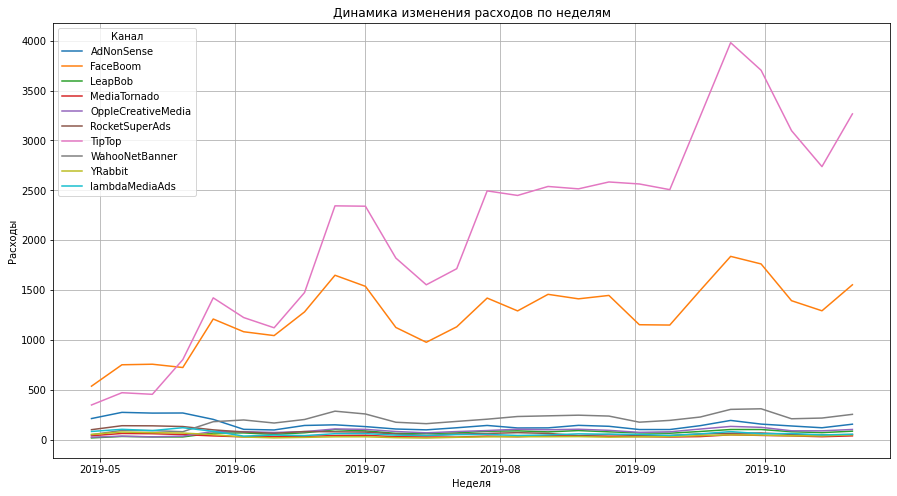

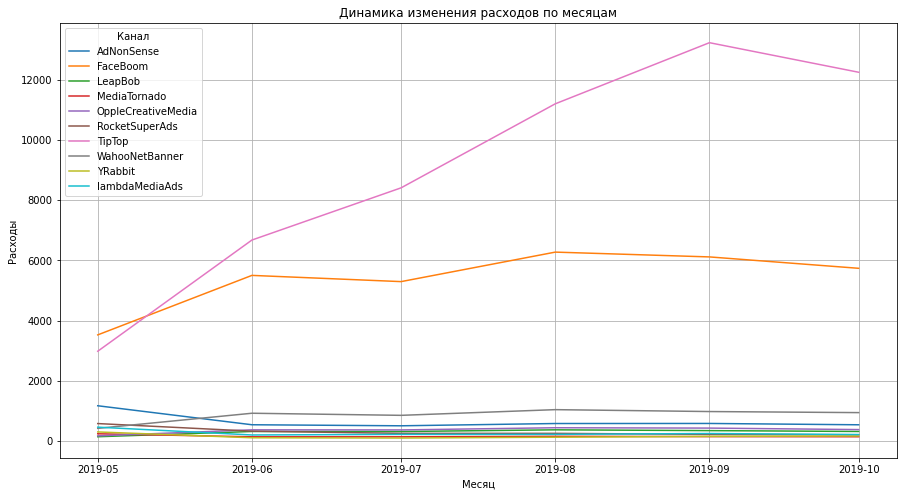

In [19]:
def visualize_costs(costs_df):
    
    # Агрегация данных по неделям и месяцам
    costs_df['week'] = costs_df['dt'].dt.to_period('W').dt.to_timestamp()
    costs_df['month'] = costs_df['dt'].dt.to_period('M').dt.to_timestamp()

    weekly_costs = costs_df.groupby(['week', 'channel']).agg({'costs': 'sum'}).reset_index()
    monthly_costs = costs_df.groupby(['month', 'channel']).agg({'costs': 'sum'}).reset_index()
    # Визуализация данных по неделям
    plt.figure(figsize=(15, 8))
    sns.lineplot(data=weekly_costs, x='week', y='costs', hue='channel')
    plt.xlabel('Неделя')
    plt.ylabel('Расходы')
    plt.title('Динамика изменения расходов по неделям')
    plt.legend(title='Канал')
    plt.grid(True)
    plt.show()

    # Визуализация данных по месяцам
    plt.figure(figsize=(15, 8))
    sns.lineplot(data=monthly_costs, x='month', y='costs', hue='channel')
    plt.xlabel('Месяц')
    plt.ylabel('Расходы')
    plt.title('Динамика изменения расходов по месяцам')
    plt.legend(title='Канал')
    plt.grid(True)
    plt.show()
    
    
# Замените df_costs на имя вашего датафрейма
visualize_costs(ad_costs)

**Вывод:**


**Расходы на маркетинг по месяцам:**

- В мае 2019 года общая сумма расходов составила 12,049
- В июне 2019 года общая сумма расходов увеличилась до 16,771
- В июле 2019 года общая сумма расходов немного снизилась до 16,384
- В августе 2019 года общая сумма расходов возросла до 20,848
- В сентябре 2019 года общая сумма расходов снова увеличилась до 22,936
- В октябре 2019 года общая сумма расходов незначительно снизилась до 22,681

**Типичная динамика затрат по каналам:**

- TipTop: Расходы растут с течением времени, достигая пика в сентябре.
- FaceBoom: Расходы имеют тенденцию к увеличению, хотя с сентября по октябрь наблюдается небольшое снижение.
- WahooNetBanner: Расходы увеличиваются с течением времени, но в меньшей степени, чем у других каналов.
- YRabbit: Расходы немного колеблются, но в целом увеличиваются с течением времени.
- lambdaMediaAds: Расходы показывают небольшой рост в течение времени.


Остальные каналы показывают относительно стабильные расходы на протяжении всего времени.

В общем и целом, данные показывают, что компания увеличивает расходы на маркетинг, причем особенно активно инвестирует в каналы TipTop и FaceBoom. В то же время, другие каналы имеют более стабильные или медленно растущие расходы. Выше мы уже выянсли, что распределение львиной части бюджета на канал TipTop не является самой эффективной стратегией.

#### Рассчёт CAC для каждого источника.

In [20]:
def cac_calc(profiles):
    min_date = profiles['dt'].min()
    max_date = profiles['dt'].max()
    days_num = (max_date - min_date).days
    
    daily_costs = []
    for index, values in ad_costs.iterrows():
        channel_name = values['channel']
        channel_costs = values['costs']
        avg_channel_costs = channel_costs / days_num
        for i in range(days_num):
            current_day = min_date + timedelta(days=i)
            daily_costs += [[current_day, channel_name, avg_channel_costs]]
    daily_costs = pd.DataFrame(daily_costs, columns=['dt', 'channel', 'costs'])
    daily_costs['dt'] = daily_costs['dt'].dt.date

    cac_by_channel = pd.DataFrame()
    # уберём органических пользователей:
    profiles = profiles.query('channel != "organic"')
    cac_by_channel['average_engagement_cost'] = profiles.groupby('channel')['acquisition_cost'].mean()
    return cac_by_channel.sort_values(by='average_engagement_cost', ascending=False).style.format({'average_engagement_cost': '{:.2f}'})

cac_by_channel = cac_calc(profiles)
cac_by_channel

,average_engagement_cost
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


**Вывод:**

Наибольшая стоимость привлечения клиента наблюдается у канала TipTop (2.80), что может указывать на более высокие затраты на рекламу в этом канале или на более сложный процесс привлечения пользователей.

Канал FaceBoom также имеет сравнительно высокий CAC, равный 1.11, что может быть связано с тем, что этот канал привлекает большое количество пользователей, и, возможно, требует более интенсивных маркетинговых усилий.

С другой стороны, каналы с низким CAC, такие как LeapBob, OppleCreativeMedia, YRabbit и MediaTornado, имеют низкий процент платящих пользователей, что может указывать на необходимость оптимизации маркетинговых стратегий для этих каналов.

Каналы AdNonSense и lambdaMediaAds имеют средний CAC и высокий процент платящих пользователей, что может указывать на хорошую эффективность маркетинговых стратегий в этих каналах.

#### Общий вывод по разделу.

Общая сумма расходов на маркетинг составляет 105,497. Большая часть бюджета тратится на каналы TipTop (51.90%) и FaceBoom (30.75%). Однако, доля платящих пользователей для этих каналов не является самой высокой. Органический канал привлекает наибольшее количество пользователей, но имеет низкую долю платящих пользователей. Некоторые каналы с меньшими расходами обладают более высокой долей платящих пользователей.

Рекомендуется провести анализ эффективности маркетинговых кампаний по каждому каналу и перераспределить бюджет в пользу каналов с высоким потенциалом привлечения платящих клиентов. Важно также улучшить конверсию пользователей из органического канала и определить целевую аудиторию для каждого маркетингового канала.

Динамика затрат на маркетинг показывает увеличение расходов с течением времени, причем особенно активно инвестируются средства в каналы TipTop и FaceBoom, в то время как другие каналы имеют более стабильные или медленно растущие расходы.

### Оценка окупаемости рекламы.

Используем графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Предположим, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. 

- Проанализирую окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверю конверсию пользователей и динамику её изменения. То же самое сделаю с удержанием пользователей. Построю и изучу графики конверсии и удержания.
- Проанализирую окупаемость рекламы с разбивкой по устройствам. Построю графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализирую окупаемость рекламы с разбивкой по странам. Построю графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализирую окупаемость рекламы с разбивкой по рекламным каналам. Построю графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Отвечу на вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

 
 
     *Необходимость включения в анализ органических пользователей определяю самостоятельно.

#### Анализ окупаемости, графики LTV и ROI + LTV, CAC и ROI в динамике.

In [21]:
# исключаем канал organic из анализа окупаемости
f_profiles = profiles.query('channel != "organic"')

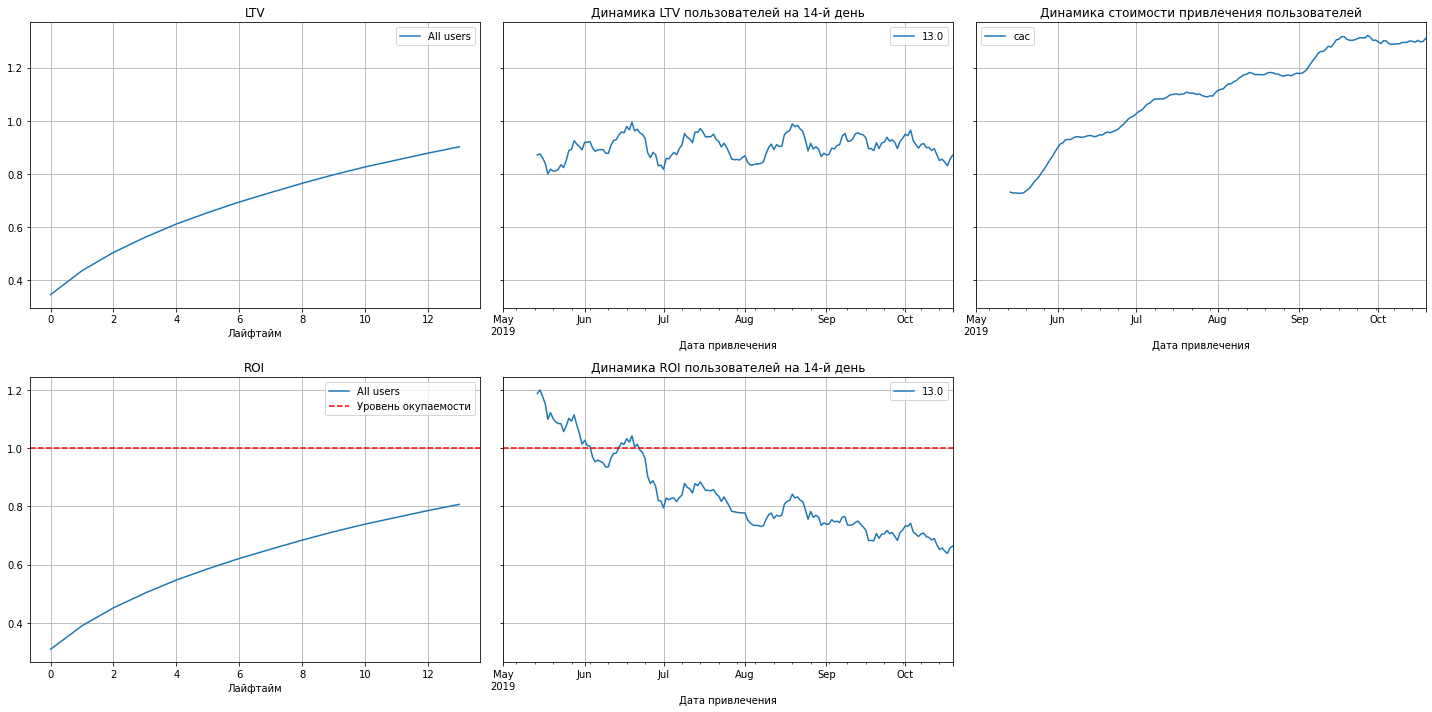

In [22]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    f_profiles, orders,  observation_date, analysis_horizon)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon) 


**Вывод:**

 - Динамика ROI пользователей на 14-й день снижается с серидины мая, в конце июня падает ниже уровня окупаемости, а с середины июня не может закрепиться выше уровня окупаемости. Данные подтверждают проблему заказчика, компания терпит убытки.


- Динамика LTV пользователей на 14-й день гуляет в диапазоне 0,8 - 0,1, это может косвенно указывать на то, что удержание работет и пользователи возвращаются. 


- Динамака стоимости привлечения пользователей начинает резкий (двухкратный) рост с середины июня от 0.78 и продолжает расти к уровню 1.2 до начала сентября, оставаясь на высоких отметках, выше уровня LTV. Именно это и не позволяет компании выйти хотя бы на окупаемость. 


- Анализ графиков показывает, что LTV и ROI продолжают расти в течение 14 дней. Однако, на 14-й день ROI достигает всего 80%, что указывает на то, что инвестиции в привлечение пользователей не окупаются.


Постоянно растущие расходы на маркетинг не дают компании зарабатывать деньги. Учитывая  анализ рекламных источников, я предполагаю что текущая картина могла бы быть совсем иной, если бы не трата половины маркетинкого бюджета на канал продвижения `TipTop`. Проверим эту гипотизу позже, построя те же графики игнорируя самый дорогой канал привлечения.

#### Конверсия / удержание пользователей.

##### Общая конверсия / удержание.

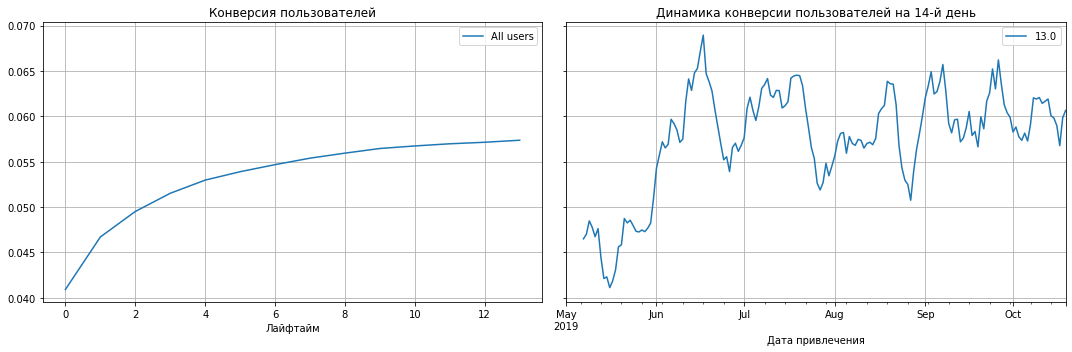

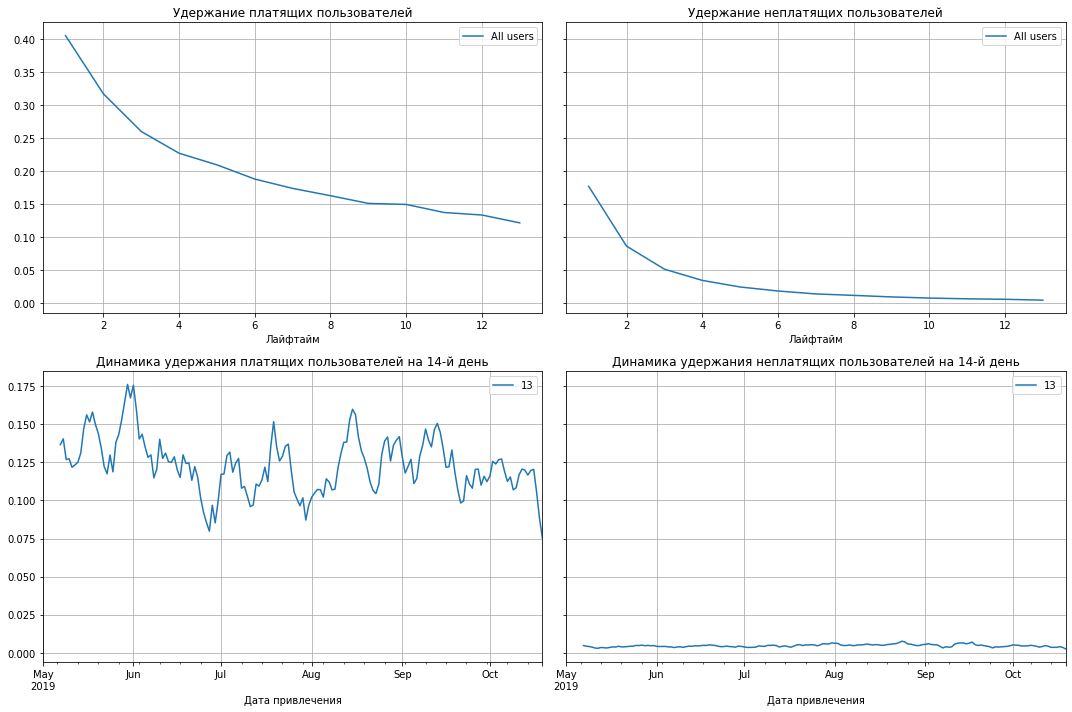

In [23]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, sessions, observation_date, analysis_horizon)

plot_retention(retention_grouped, retention_history, analysis_horizon)

**Вывод:**

- Конверсия пользователей выглядит нормально, после 7 дня конверсия растёт заметно слабее. Здесь может быть точка роста.


- Динамика с июня по конец августа двигается в с амплитудой 0.1 - 0.15 пунктов. С начала сентября не опускается ниже 0.55. и выходит на плато, летняя волатильность может быть связана с периодом отпусков. 


- Удержание платящих и неплатящих пользователей закономерно снижается со временем, тут стоить отметить, что неплатящие пользователи удерживаются очень слабо и на 7й день практически сходят на нет. Это так же соотносится с небольшой конверсией во вторую неделю.


- Динамика удержания платящих пользователей с сентября упала практически вдвое и находится на минимальных отметках. Неплатящие пользователи практически не удерживаются, возможно это связано с отсутвием бесплатных полезных функций продукта. 

##### Общая конверсия / удержание по устройствам.

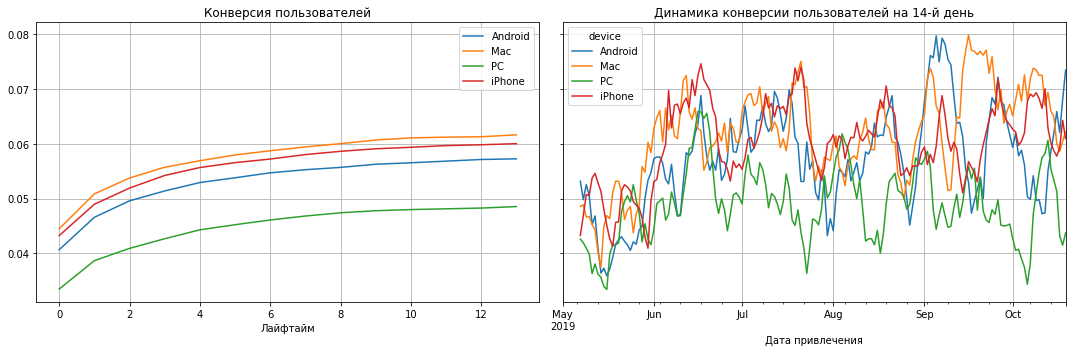

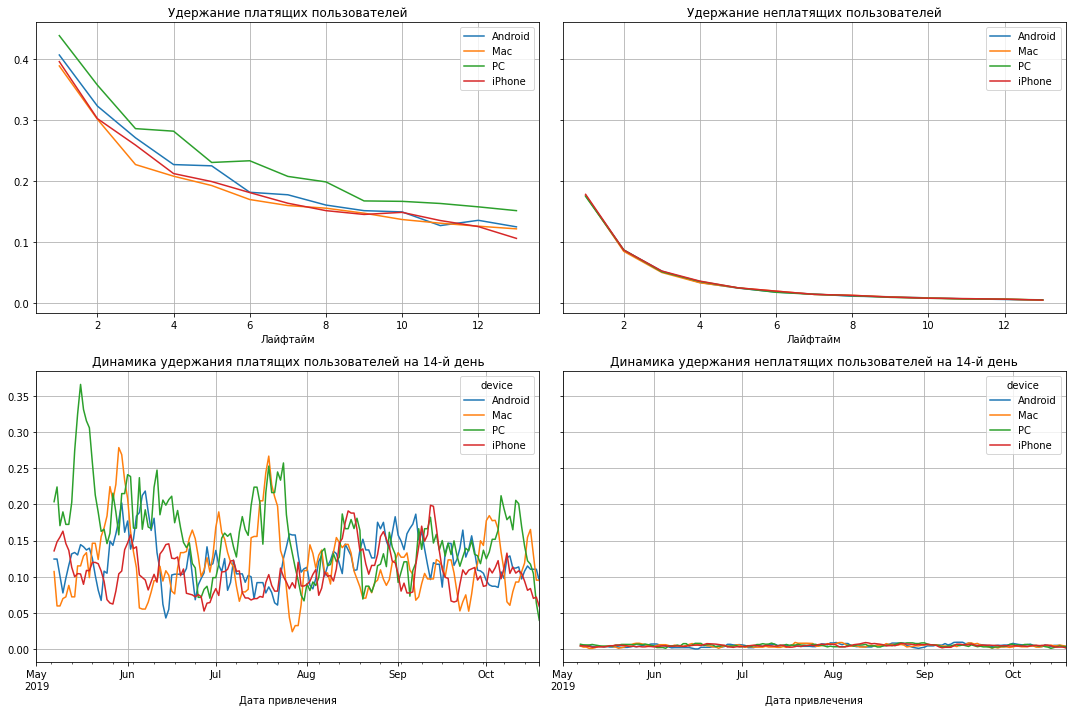

In [24]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions = ['device'])

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, sessions, observation_date, analysis_horizon, dimensions = ['device'])

plot_retention(retention_grouped, retention_history, analysis_horizon)

In [25]:
conversion_grouped

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
device,,,,,,,,,,,,,,,
Android,33288,0.040675,0.046593,0.049597,0.051400,0.052932,0.053803,0.054704,0.055275,0.055696,0.056267,0.056537,0.056837,0.057138,0.057258
Mac,28588,0.044494,0.050861,0.053764,0.055723,0.056912,0.057961,0.058731,0.059431,0.060025,0.060690,0.061075,0.061214,0.061284,0.061634
PC,28978,0.033508,0.038685,0.040928,0.042688,0.044309,0.045241,0.046104,0.046829,0.047415,0.047795,0.048002,0.048140,0.048278,0.048554
iPhone,51766,0.043252,0.048970,0.051926,0.054225,0.055674,0.056562,0.057219,0.058030,0.058629,0.059093,0.059363,0.059672,0.059827,0.060020


**Вывод:**


-  Платящих пользователей PC удаётся удерживать лучше всего. Самые высокие пики в динамике удержания так же отражают это.


-  Далее по убыванию расположились обладатели систем Android, Mac и iPhone. 


-  Более стабильными по удержанию являются пользователи мобильных приложений.


-  Среди неплатящих пользователей нельзя выделить лидеров и оутсайдеров, все они сливаются в одну падающую линиию. 


- Каналы с наибольшим количеством пользователей (cohort_size) в данном анализе: FaceBoom, TipTop, и organic. Эти каналы имеют наибольшее количество пользователей, поэтому они могут оказывать большое влияние на общую конверсию.


- Каналы с наибольшим увеличением конверсии с течением времени: lambdaMediaAds, RocketSuperAds, и TipTop. Эти каналы показывают наибольший рост конверсии и, возможно маркетологи думают что эти каналы являются наиболее эффективными каналами для удержания пользователей.


- Каналы с наименьшим увеличением конверсии с течением времени: organic, LeapBob, и OppleCreativeMedia. Эти каналы имеют наименьший рост конверсии, что может указывать на низкую эффективность их стратегий удержания пользователей.


В целом, каналы с наибольшим ростом конверсии и наиболее высокими значениями конверсии на 14-й день могут быть наиболее эффективными для удержания и привлечения пользователей. Однако, для более глубокого анализа рекомендуется учесть такие факторы, как стоимость на пользователя для каждого канала, вовлеченность пользователей, и другие метрики, которые могут помочь определить наиболее выгодные и эффективные каналы продвижения.

##### Общая конверсия / удержание по регионам.

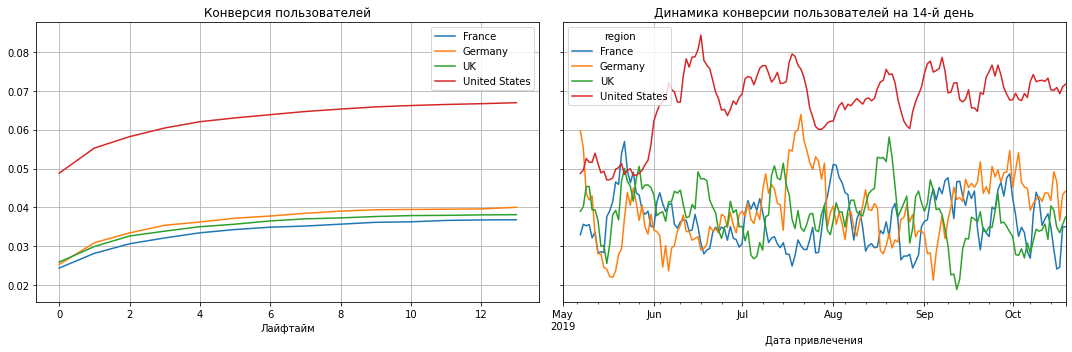

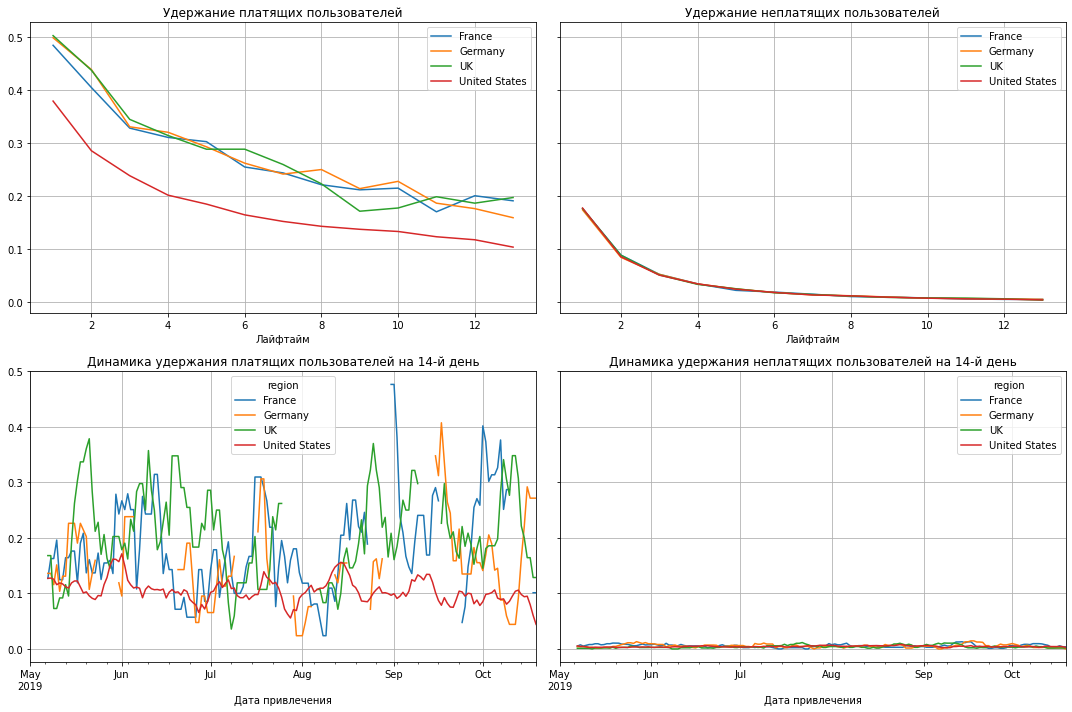

In [26]:
# смотрим конверсию с разбивкой по регионам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions = ['region'])

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, sessions, observation_date, analysis_horizon, dimensions = ['region'])

plot_retention(retention_grouped, retention_history, analysis_horizon)

**Вывод:**

- Конверсия пользователей из США в заметно выше чем в остальных регионах, 0.68 против 0.39. Округлив, можно сказать что пользователи из США конвертируются на 75% лучше чем из остальных регионов. Динамика конверсии закономерно отображает более стабильно высокую конверсию пользователей из США. 


- Далее по убыванию степени конверсии располагаются Германия, Великобритания, Франция. В динамике конверсии все три страны двигаются в широком диапазоне, от 0.2 до 0.6. 


- При самой высокой конверсии пользователей из США, удержание платящих пользователей заметно ниже чем в остальных странах, 0.1 у США против 0.2 у Франции и Великобиртании и 0.17 в Германии. Это определённо повод провезти отдеьный анализ по региону США и выяснить причины низкого удержания относительно остальных регионов.


- В динмике удержания платящих пользователей США выглядит достаточно стабильно, но при этом низко. Волатильность динамики удержания других трёх регинов намного выше относительно США. 


- Неплатящие пользователи из всех регионов так же ни чем не выделяются, их объеденяет только стабильное снижение. 

##### Общая конверсия / удержание по каналам привлечения.  

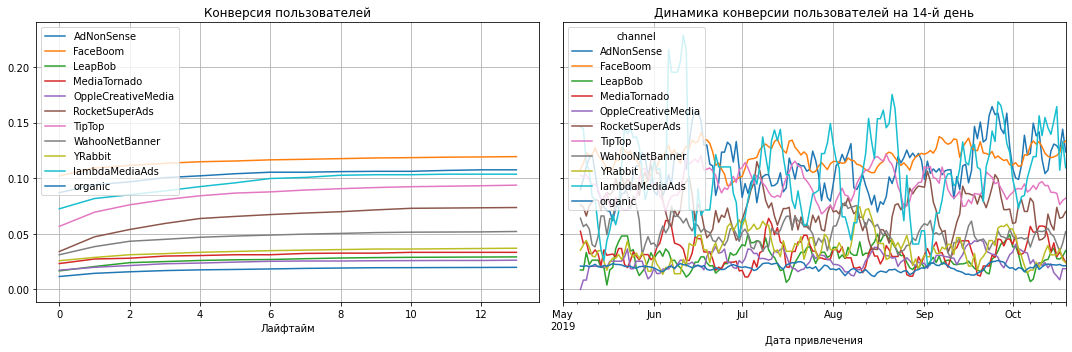

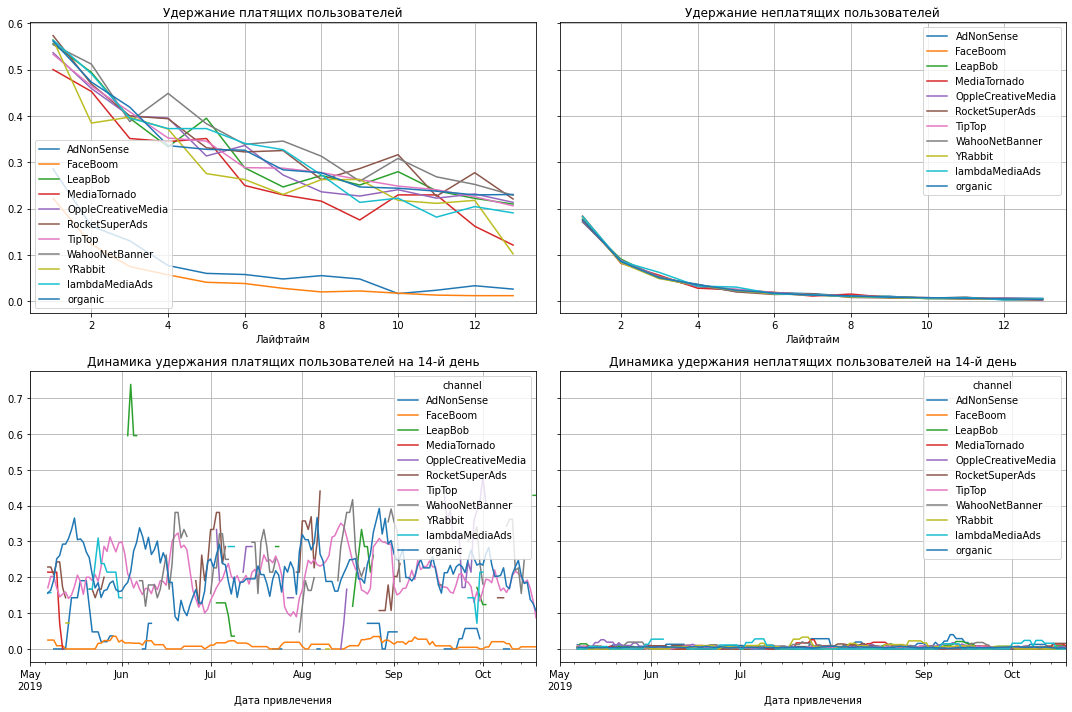

In [27]:
# смотрим конверсию с разбивкой по каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions = ['channel'])

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, sessions, observation_date, analysis_horizon, dimensions = ['channel'])

plot_retention(retention_grouped, retention_history, analysis_horizon)

**Вывод:**


- FaceBoom и Organic имеют самые большие размеры когорт (27544 и 53976 соответственно), что означает, что через эти каналы привлекается наибольшее количество пользователей.


- Конверсия пользователей в целом увеличивается с увеличением количества дней после привлечения, что свидетельствует о том, что люди становятся более активными или вовлеченными со временем.


- Разные каналы привлечения имеют различные уровни конверсии. Например, LambdaMediaAds имеет самую высокую начальную конверсию (0.072), тогда как Organic имеет самую низкую начальную конверсию (0.011). Это может говорить о разной эффективности каналов привлечения в плане привлечения заинтересованных пользователей.


- Для некоторых каналов привлечения, таких как AdNonSense и FaceBoom, конверсия пользователей стабилизируется со временем, тогда как для других, таких как LeapBob и MediaTornado, увеличение конверсии продолжается на протяжении всего временного интервала (14 дней).



- Среди пользователей, не совершивших покупку, самый высокий показатель удержания на 14-й день имеют каналы WahooNetBanner (0.0053) и YRabbit (0.0050). Самый низкий показатель у FaceBoom (0.0043).


- Среди пользователей, совершивших покупку, самый высокий показатель удержания на 14-й день имеют каналы LeapBob (0.20) и YRabbit (0.10). Самый низкий показатель у MediaTornado (0.12).


- Удержание пользователей снижается с течением времени в обеих группах (платящих и не платящих пользователей) по всем каналам привлечения. Это ожидаемое поведение, поскольку с течением времени пользователи теряют интерес к продукту или услуге.


- Для пользователей, совершивших покупку, наиболее стабильные каналы (с меньшим снижением удержания со временем) - LeapBob, YRabbit и lambdaMediaAds. Для пользователей, не совершивших покупку, наиболее стабильные каналы - WahooNetBanner и YRabbit.


- В целом, рекомендую сосредоточить внимание на каналах с высоким и стабильным удержанием пользователей, таких как WahooNetBanner, YRabbit и LeapBob. Они могут быть наиболее перспективными для инвестиций в маркетинг и улучшения продукта или услуги.


#### Окупаемость рекламы по утройствам/регионам/каналам привлечения.

##### Окупаемость рекламы с разбивкой по устройствам. (ROI, LTV, CAC)

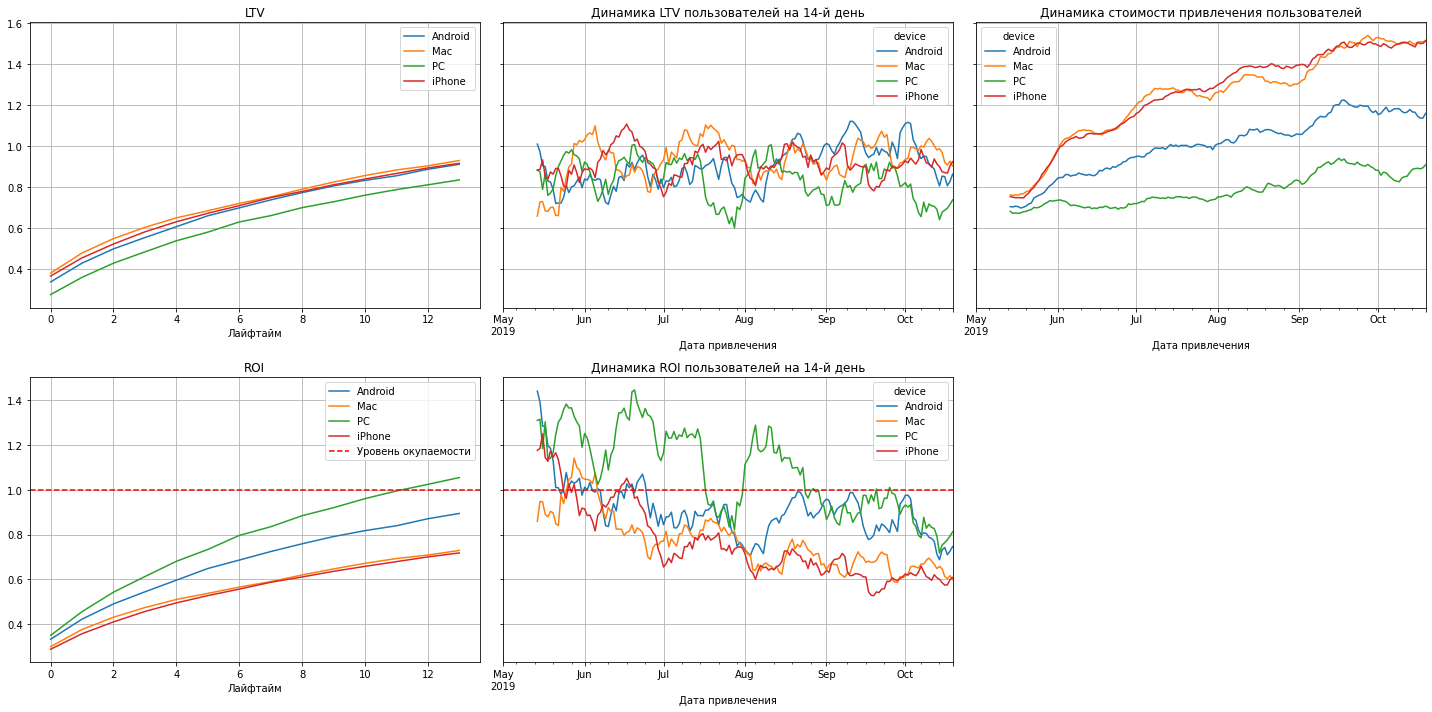

In [28]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    f_profiles, orders,  observation_date, analysis_horizon, dimensions = ['device'])

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon) 

**Вывод:**

Android:

- Затраты на привлечение клиента (CAC) составляют 1.02, что является средним значением среди всех устройств.
- ROI увеличивается с течением времени, достигая 0.89 на 14-й день.
- LTV также растет со временем, достигая 0.91 на 14-й день.

PC:

- Затраты на привлечение клиента (CAC) составляют 0.79, что является наименьшим значением среди всех устройств.
- ROI увеличивается с течением времени, достигая 1.054 на 14-й день, что является наибольшим значением среди всех устройств.
- LTV также растет со временем, достигая 0.83 на 14-й день, что является наименьшим значением среди всех устройств.


iPhone:

- Затраты на привлечение клиента (CAC) составляют 1.27, что является одним из наибольших значений среди всех устройств.
- ROI увеличивается с течением времени, достигая 0.71 на 14-й день, что является наименьшим значением среди всех устройств.
- LTV также растет со временем, достигая 0.91 на 14-й день, что является одним из наибольших значений среди всех устройств.



Mac:

- Затраты на привлечение клиента (CAC) составляют 1.27, что является наибольшим значением среди всех устройств.
- ROI увеличивается с течением времени, достигая 0.72 на 14-й день.
- LTV также растет со временем, достигая 0.93 на 14-й день.



Пользователи PC это единсвенный сегмент который имеет наименьшие затраты на привлечение клиента (CAC) и наибольший ROI на 14-й день. Это указывает на то, что привлечение пользователей PC окупается и приносит реальную прибыль. Несмотря на наименьший LTV на 14-й день у пользователей PC, этот сегмент пользователей все еще имеет наибольший ROI на 14-й день. Можно предположить, что маркетинговые стратегии или продукт могут быть менее привлекательными для пользователей PC, поэтому стоит рассмотреть возможность оптимизации продукта или маркетинговых стратегий для увеличения LTV для этого сегмента.


Пользователи Mac и iPhone имеют самые высокие затраты на привлечение клиента (CAC), что может объяснять их относительно низкий ROI на 14-й день. Оптимизация затрат на привлечение клиентов для этих устройств может улучшить их ROI.

Пользователи iPhone, Mac и Android имеют более высокий LTV на 14-й день, что может указывает на то, что пользователи этих устройств приносят больше прибыли в сравнении с пользователями PC. Это может быть связано с различиями в поведении пользователей, их платежной способностью или предпочтениями. Маркетологи могут уделить больше внимания этим сегментам пользователей и настроить свои маркетинговые стратегии, чтобы снизить CAC и максимизировать LTV и удержание пользователей.

Важно учитывать удержание пользователей на протяжении всего периода анализа (14 дней), так как и ROI, и LTV увеличиваются со временем для всех устройств. Это подчеркивает значимость удержания пользователей для увеличения прибыли и оптимизации затрат на привлечение клиентов.



##### Окупаемость рекламы с разбивкой по регионам. (ROI, LTV, CAC)

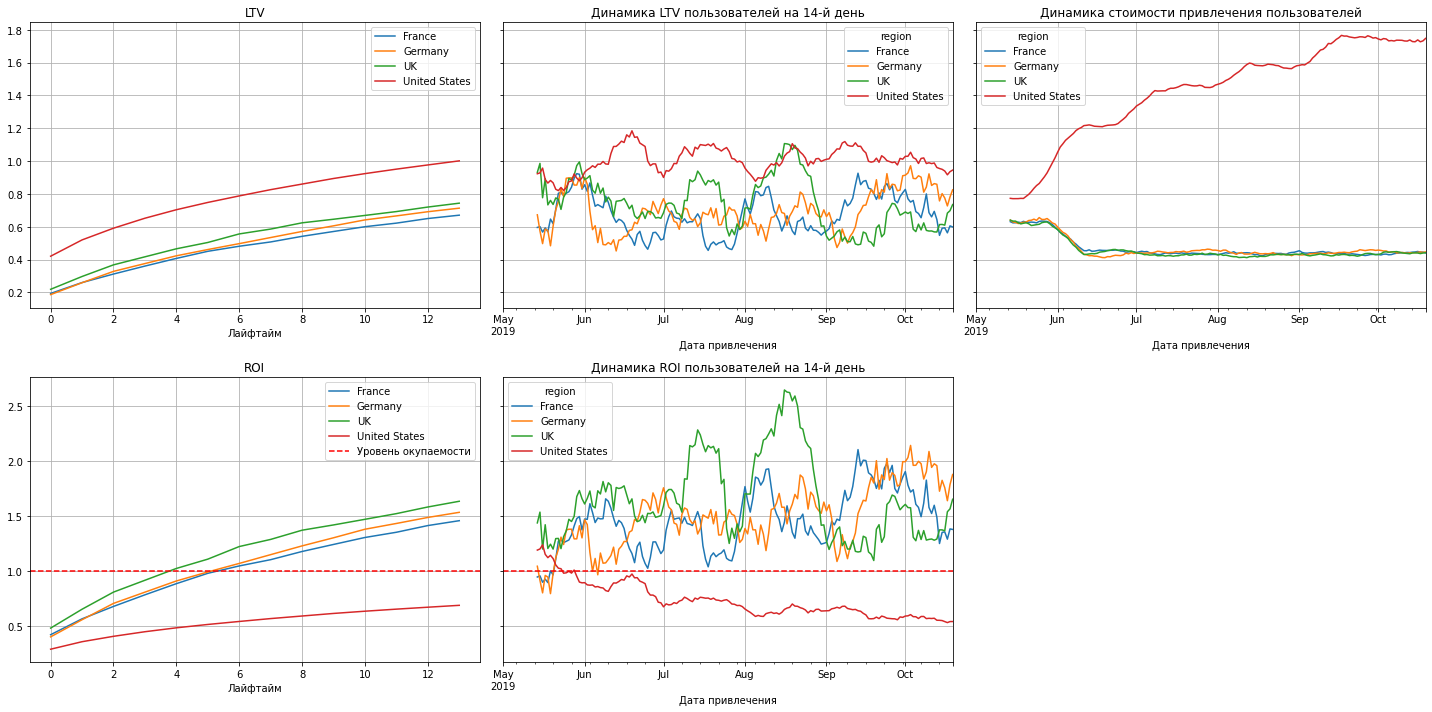

In [29]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    f_profiles, orders,  observation_date, analysis_horizon, dimensions = ['region'])

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon) 

**Вывод:**


- Самый высокий LTV наблюдается у пользователей из США, а самый низкий - у пользователей из Франции.


- LTV во всех регионах растет на протяжении 14 дней, что указывает на то, что прибыль от пользователей увеличивается с течением времени.


- Рост LTV в течение периода наблюдения наиболее заметен в США и наименее заметен в Франции.


- Отметим, что затраты на привлечение клиентов (CAC) варьируются существенно: Соединенные Штаты имеют самые высокие затраты (1.8), в то время как Франция, Германия и Великобритания имеют схожие и более низкие затраты в районе 0.4.

Таким образом, несмотря на более высокие затраты на привлечение клиентов, Соединенные Штаты показывают наименьший ROI по сравнению с другими странами. Это может свидетельствовать о том, что маркетинговые стратегии, применяемые в Соединенных Штатах, являются менее эффективными. В свете этого анализа, для повышения ROI рекомендуется пересмотреть и оптимизировать маркетинговые кампании, особенно в Соединенных Штатах. Результаты из Великобритании, Германии и Франции могут быть использованы как отправная точка для анализа того, какие стратегии работают наиболее эффективно и почему. Рассмотрите возможность адаптации успешных методов для использования на американском рынке, чтобы повысить ROI в этом регионе.





##### Окупаемость рекламы с разбивкой по каналам привлечения. (ROI, LTV, CAC)

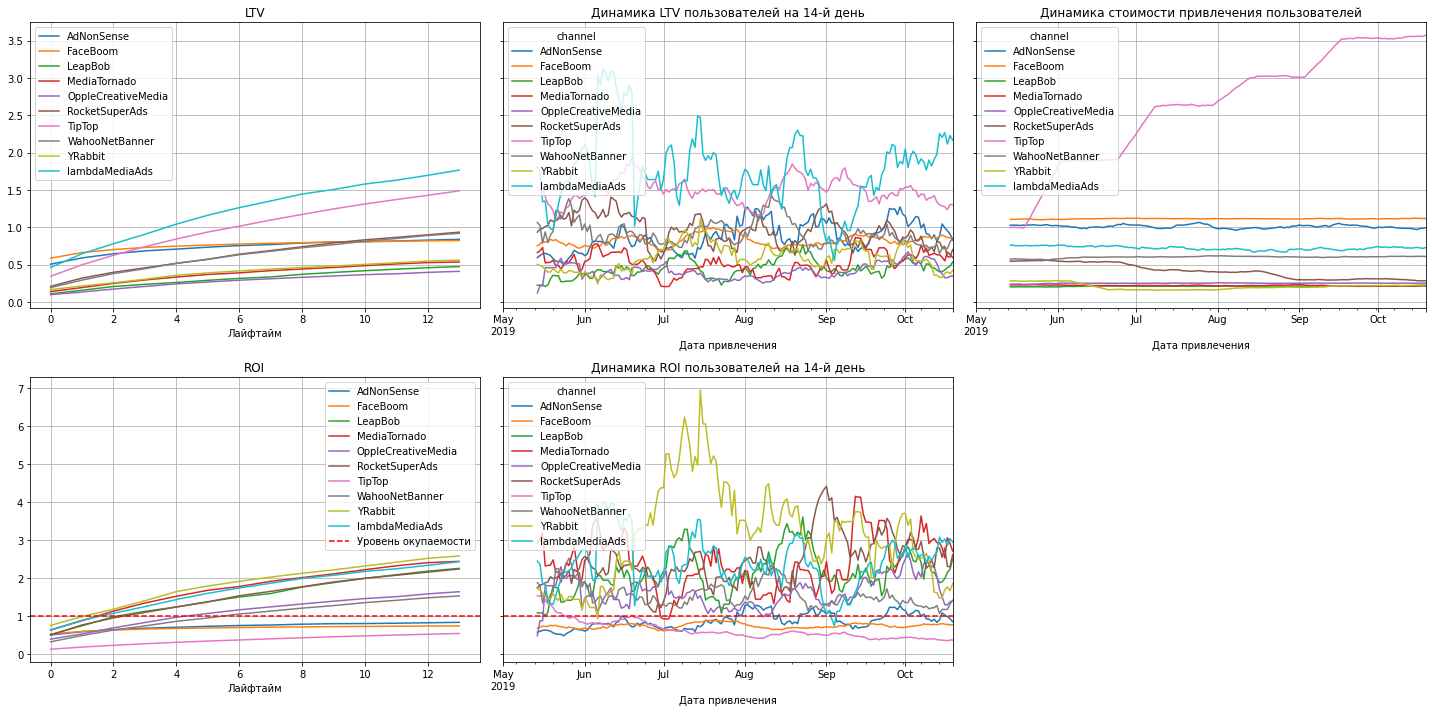

In [30]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    f_profiles, orders,  observation_date, analysis_horizon, dimensions = ['channel'])

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon) 

**Вывод:**


AdNonSense:

- LTV достигает 0.838 после 14 дней.
- ROI достигает 0.831 после 14 дней.
- Низкий ROI по сравнению с LTV, что указывает на возможность оптимизации расходов.

FaceBoom:

- LTV достигает 0.821 после 14 дней.
- ROI достигает 0.738 после 14 дней.
- Несмотря на высокий LTV, ROI все еще меньше 1, что указывает на необходимость оптимизации.

LeapBob:

- LTV достигает 0.473 после 14 дней.
- ROI достигает 2.252 после 14 дней.
- Отличный ROI, что указывает на хорошую оптимизацию затрат и эффективность канала.


MediaTornado:

- LTV достигает 0.534 после 14 дней.
- ROI достигает 2.437 после 14 дней.
- Хороший ROI, что указывает на успешную оптимизацию затрат и эффективность канала.

OppleCreativeMedia:

- LTV достигает 0.409 после 14 дней.
- ROI достигает 1.637 после 14 дней.
- Приемлемый ROI, хотя есть потенциал для дальнейшей оптимизации.

RocketSuperAds:

- LTV достигает 0.934 после 14 дней.
- ROI достигает 2.237 после 14 дней.
- Отличный ROI, что указывает на хорошую оптимизацию затрат и эффективность канала.

TipTop:

- LTV достигает 1.488 после 14 дней.
- ROI достигает 0.540 после 14 дней.
Низкий ROI по сравнению с LTV, что указывает на возможность оптимизации расходов.

WahooNetBanner:

- LTV достигает 0.919 после 14 дней.
- ROI достигает 1.526 после 14 дней.
- Приемлемый ROI, хотя есть потенциал для дальнейшей оптимизации.

YRabbit:

- LTV достигает 0.560 после 14 дней.
- ROI достигает 2.578 после 14 дней.
- Отличный ROI, что указывает на хорошую оптимизацию затрат и эффективность канала.


lambdaMediaAds:

- LTV достигает 1.766 после 14 дней.
- ROI достигает 2.429 после 14 дней.
- Отличный ROI, что указывает на хорошую оптимизацию затрат и эффективность канала.


Каналы LeapBob, MediaTornado, RocketSuperAds, YRabbit и lambdaMediaAds имеют хороший ROI после 13 дней, что указывает на эффективность и оптимизацию затрат. Рекомендуется продолжать инвестировать в эти каналы.

Каналы AdNonSense, FaceBoom и TipTop имеют низкий ROI по сравнению с LTV после 13 дней, что указывает на возможность оптимизации расходов. Рекомендуется пересмотреть стратегию продвижения для этих каналов, чтобы улучшить их эффективность.

Каналы OppleCreativeMedia и WahooNetBanner имеют приемлемый ROI после 13 дней, хотя есть потенциал для дальнейшей оптимизации. Рекомендуется анализировать данные и определить возможности для улучшения эффективности этих каналов.

Динамика стоимости привлечения по каналу TipTop растёт в течении всего времени и намного выше чем у остальных каналов, что визуально коррелирует с динамикой стоимости привлечения пользователей из США. Этому каналу стоит уделить особое внимание так как высокая стоимость может указывать на неэффективность маркетинговых кампаний или проблемы с привлечением клиентов через этот канал.


В целом, стоит сконцентрироваться на оптимизации расходов для каналов с низким ROI и продолжать инвестировать в каналы с хорошим ROI.
Обратите внимание на каналы с быстрым ростом ROI, такие как LeapBob и OppleCreativeMedia. Они могут предоставить хорошие возможности для дополнительного вложения средств и роста.

#### Ответы на вопросы.

##### Окупается ли реклама, направленная на привлечение пользователей в целом?

Нет, в текущей ситуации расходы компании на рекламу превышают доходы от пользователей.

##### Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?

- Устройства: Пользователи Mac и iPhone имеют более высокий LTV, но их затраты на привлечение клиентов (CAC) значительно выше по сравнению с пользователями PC и Android. Это может указывать на необходимость оптимизации маркетинговых затрат для Mac и iPhone, чтобы повысить ROI.


- Страны: США демонстрируют низкий ROI, несмотря на более высокие затраты на привлечение клиентов. Это может указывать на неэффективность маркетинговых стратегий в данном регионе. Франция показывает самый низкий LTV и ROI среди рассмотренных стран, что может указывать на возможные проблемы с окупаемостью рекламы в данной стране. 


- Каналы привлечения: TipTop демонстрирует высокую стоимость привлечения клиентов. Высокая стоимость может указывать на неэффективность маркетинговых кампаний или проблемы с привлечением клиентов через этот канал. AdNonSense и FaceBoom оба канала имеют сравнительно низкий ROI, что может указывать на необходимость оптимизации маркетинговых кампаний для повышения эффективности.

##### Чем могут быть вызваны проблемы окупаемости?

- Неэффективные маркетинговые стратегии: Маркетинговые кампании могут быть неадекватно настроены или нацелены на неправильную аудиторию, что может привести к низкому ROI и ослабить окупаемость рекламы.


- Высокая конкуренция: В некоторых регионах или отраслях конкуренция может быть настолько сильной, что затраты на привлечение клиентов значительно возрастают, что влияет на окупаемость рекламных инвестиций.


- Неоптимальное распределение бюджета: Иногда компании могут распределять бюджет между различными рекламными каналами неоптимальным образом, что может привести к низкой окупаемости отдельных каналов.


- Изменение потребительского поведения: Иногда поведение пользователей может меняться со временем, что может влиять на окупаемость рекламных кампаний. Важно адаптировать маркетинговые стратегии к изменяющимся предпочтениям аудитории.


- Проблемы с анализом данных: Неправильная интерпретация данных или использование неподходящих метрик для оценки окупаемости рекламы может привести к неправильным выводам и принятию неэффективных решений.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

**Причины неэффективности привлечения пользователей:**
- Неоптимальное распределение маркетингового бюджета между устройствами: Затраты на привлечение клиентов (CAC) значительно выше для пользователей Mac и iPhone по сравнению с пользователями PC и Android, что может указывать на необходимость оптимизации маркетинговых затрат для этих устройств.


- Неэффективные маркетинговые стратегии в Соединенных Штатах: Низкий ROI в США может свидетельствовать о неэффективности маркетинговых стратегий в этом регионе.


- Проблемы с привлечением клиентов через канал TipTop: Высокая стоимость привлечения клиентов через этот канал может указывать на неэффективность маркетинговых кампаний или проблемы с привлечением клиентов.


**Рекомендации для отдела маркетинга:**

- Оптимизировать маркетинговые затраты для разных устройств: Провести анализ распределения бюджета между устройствами и определить возможности для оптимизации затрат, особенно для пользователей Mac и iPhone.


- Пересмотреть и оптимизировать маркетинговые стратегии в Соединенных Штатах: Изучить успешные стратегии из других стран и адаптировать их для использования на американском рынке с целью повышения ROI.


- Рассмотреть возможности для дополнительных инвестиций в каналы с быстрым ростом ROI, такие как LeapBob и OppleCreativeMedia: Изучить причины их успеха и использовать полученные данные для определения возможностей для роста и дополнительных вложений.


- Сосредоточьтесь на каналах с высоким ROI: MediaTornado, RocketSuperAds и YRabbit показывают наилучшие результаты в отношении ROI. Рекомендуется увеличить инвестиции в эти каналы, так как они приносят большую отдачу на вложенные средства.



- Оптимизация FaceBoom: FaceBoom имеет самый большой объем когорты, но его ROI ниже остальных каналов. Это указывает на необходимость оптимизации маркетинговых стратегий. Рассмотрите возможность сегментации аудитории, тестирования различных рекламных форматов и креативов, а также пересмотра бюджета для повышения эффективности канала.



- Улучшение канала TipTop: TipTop имеет самый высокий LTV среди всех каналов, но его ROI низкий. Рекомендуется Проанализировать и улучшить маркетинговые кампании для канала TipTop: Изучить причины высокой стоимости привлечения клиентов через этот канал и внести соответствующие изменения для улучшения эффективности.

#### Отключите канал TipTop! 

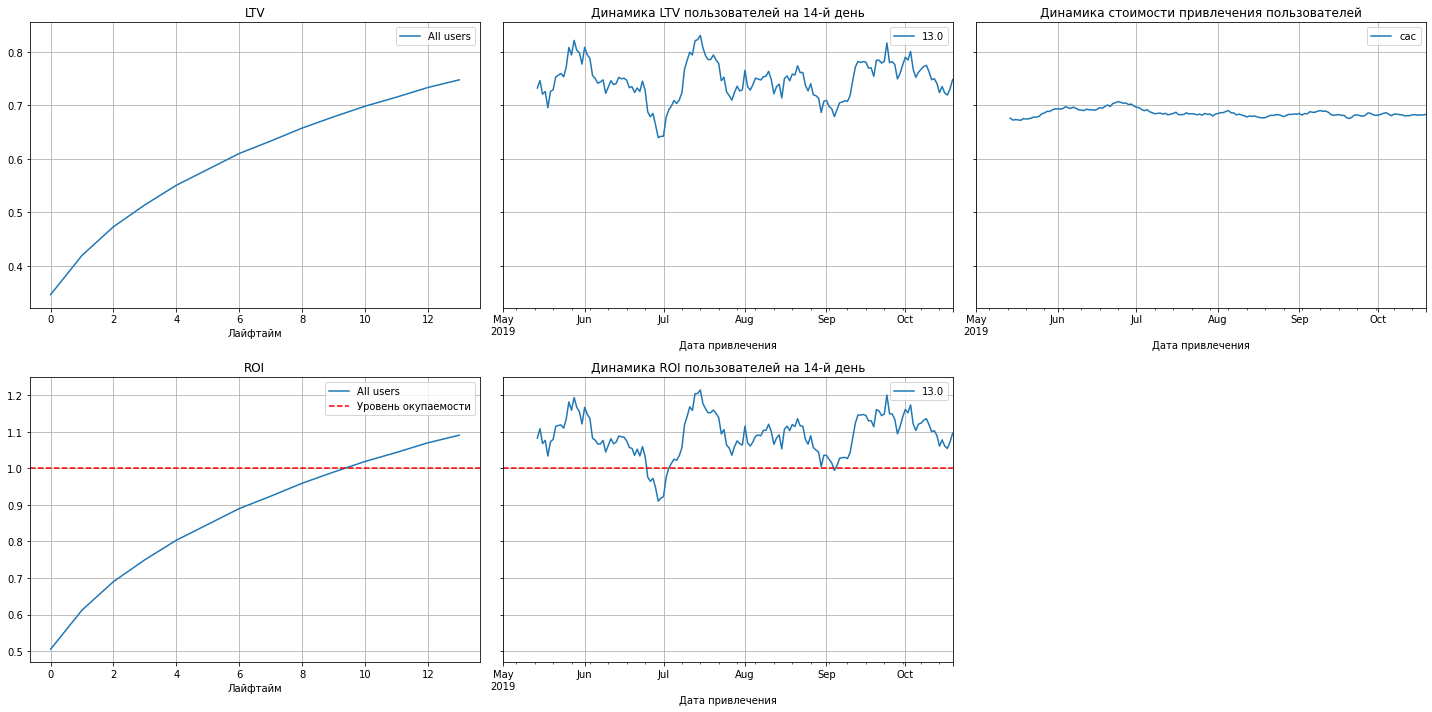

In [31]:
ft_profiles = f_profiles.query('channel != "TipTop"')
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    ft_profiles, orders,  observation_date, analysis_horizon)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon)

**Вывод:**

Картина резко меняется при отключении самого дорого канала продвижения. 

- Пользователь окупается уже на десятый день после привлечения.

- LTV растёт во времени и к концу второй недели выходит на уровень 0.74

- Расходы на стоимость привлечения с июня стабильно держатся на уровне 0.7

- Динамика LTV и ROI на 14й день выше уровня окупаемости (за исключением конца июля).